In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from tensorflow.keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score


from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('fake_news.csv')
df =df.reindex(np.random.permutation(df.index))
df.head()

,Unnamed: 0,title,text,label
29868,29868,GOP Leader Admits Benghazi Was Used In Plot T...,Benghazi was just a ploy to hurt Hillary Clint...,FAKE
26315,26315,Elizabeth Warren Announces That A Major For P...,"If there s one thing Elizabeth Warren hates, i...",FAKE
42416,42416,U.S. DEPARTMENT OF EDUCATION: Teachers Should ...,Does anyone in recent history remember the US ...,FAKE
1974,1974,New Russian ambassador to U.S. calls for resum...,MOSCOW (Reuters) - Moscow and Washington shoul...,TRUE
34401,34401,"WOW! FORD ASSEMBLY LINE Worker: In 20 Years, I...",Our good friend Brian Pannebecker is a tireles...,FAKE


In [3]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df.head()


,title,text,label
29868,GOP Leader Admits Benghazi Was Used In Plot T...,Benghazi was just a ploy to hurt Hillary Clint...,1
26315,Elizabeth Warren Announces That A Major For P...,"If there s one thing Elizabeth Warren hates, i...",1
42416,U.S. DEPARTMENT OF EDUCATION: Teachers Should ...,Does anyone in recent history remember the US ...,1
1974,New Russian ambassador to U.S. calls for resum...,MOSCOW (Reuters) - Moscow and Washington shoul...,0
34401,"WOW! FORD ASSEMBLY LINE Worker: In 20 Years, I...",Our good friend Brian Pannebecker is a tireles...,1


In [4]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['title']=df['title'].apply(remove_stopwords)

In [5]:
df.head()

,title,text,label
29868,GOP Leader Admits Benghazi Used Plot Get Hilla...,Benghazi was just a ploy to hurt Hillary Clint...,1
26315,Elizabeth Warren Announces Major Profit School...,"If there s one thing Elizabeth Warren hates, i...",1
42416,U.S. DEPARTMENT EDUCATION: Teachers Incorporat...,Does anyone in recent history remember the US ...,1
1974,New Russian ambassador U.S. calls resumed mili...,MOSCOW (Reuters) - Moscow and Washington shoul...,0
34401,"WOW! FORD ASSEMBLY LINE Worker: 20 Years, Neve...",Our good friend Brian Pannebecker is a tireles...,1


In [6]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['title'] = df['title'].str.replace(char, ' ')

In [7]:
df.head()

,title,text,label
29868,GOP Leader Admits Benghazi Used Plot Get Hilla...,Benghazi was just a ploy to hurt Hillary Clint...,1
26315,Elizabeth Warren Announces Major Profit School...,"If there s one thing Elizabeth Warren hates, i...",1
42416,U S DEPARTMENT EDUCATION Teachers Incorporat...,Does anyone in recent history remember the US ...,1
1974,New Russian ambassador U S calls resumed mili...,MOSCOW (Reuters) - Moscow and Washington shoul...,0
34401,WOW FORD ASSEMBLY LINE Worker 20 Years Neve...,Our good friend Brian Pannebecker is a tireles...,1


In [8]:
df['title']=df['title'].str.lower()
df.head()

,title,text,label
29868,gop leader admits benghazi used plot get hilla...,Benghazi was just a ploy to hurt Hillary Clint...,1
26315,elizabeth warren announces major profit school...,"If there s one thing Elizabeth Warren hates, i...",1
42416,u s department education teachers incorporat...,Does anyone in recent history remember the US ...,1
1974,new russian ambassador u s calls resumed mili...,MOSCOW (Reuters) - Moscow and Washington shoul...,0
34401,wow ford assembly line worker 20 years neve...,Our good friend Brian Pannebecker is a tireles...,1


In [9]:
df['title'] = df['title'].str.replace(r"[\"\',]", '')
df.head()

,title,text,label
29868,gop leader admits benghazi used plot get hilla...,Benghazi was just a ploy to hurt Hillary Clint...,1
26315,elizabeth warren announces major profit school...,"If there s one thing Elizabeth Warren hates, i...",1
42416,u s department education teachers incorporat...,Does anyone in recent history remember the US ...,1
1974,new russian ambassador u s calls resumed mili...,MOSCOW (Reuters) - Moscow and Washington shoul...,0
34401,wow ford assembly line worker 20 years neve...,Our good friend Brian Pannebecker is a tireles...,1


In [10]:
path = '/kaggle/input/'

EMBEDDING_FILE='glove.6B.50d.txt'

# configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 64
EPOCHS = 5

In [11]:
y = df['label'].values
X = df.drop(['label'],axis=1)

In [12]:
y.shape

(44898,)

In [13]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE, encoding="utf8") as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [14]:
print('Loading in comments...')

sentences = X.fillna("DUMMY_VALUE").values

targets = y

Loading in comments...


In [15]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(df['title']))
X = tokenizer.texts_to_sequences(list(df['title']))

# pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [16]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 29101 unique tokens.


In [17]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [18]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

In [19]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy']
)
model.summary()

Building model...
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 50)           1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 30)           7920      
_________________________________________________________________
global_max_pooling1d (Global (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 1,007,951
Trainable params: 7,951
Non-trainable params: 1,000,000
_________________________________________________________________


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, df.label,test_size=0.25, random_state=0)

In [21]:
print('Training model...')
r = model.fit(
  X_train,
  y_train,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Training model...
Epoch 1/5
421/421 [==============================] - 23s 43ms/step - loss: 0.3030 - accuracy: 0.8692 - val_loss: 0.1585 - val_accuracy: 0.9378
Epoch 2/5
421/421 [==============================] - 16s 37ms/step - loss: 0.1435 - accuracy: 0.9438 - val_loss: 0.1381 - val_accuracy: 0.9440
Epoch 3/5
421/421 [==============================] - 19s 44ms/step - loss: 0.1052 - accuracy: 0.9596 - val_loss: 0.1532 - val_accuracy: 0.9372
Epoch 4/5
421/421 [==============================] - 19s 45ms/step - loss: 0.1138 - accuracy: 0.9534 - val_loss: 0.1382 - val_accuracy: 0.9482
Epoch 5/5
421/421 [==============================] - 17s 42ms/step - loss: 0.0826 - accuracy: 0.9694 - val_loss: 0.1310 - val_accuracy: 0.9488


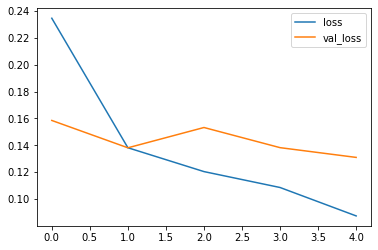

In [22]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

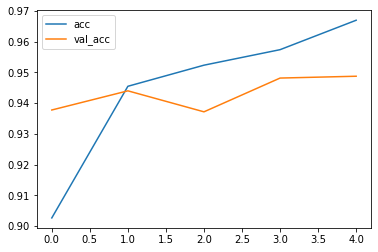

In [23]:
# Plotting accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [24]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

1053/1053 [==============================] - 9s 9ms/step - loss: 0.0822 - accuracy: 0.9695
Accuracy of the model on Training Data is -  96.9530463218689
351/351 [==============================] - 3s 9ms/step - loss: 0.1338 - accuracy: 0.9498
Accuracy of the model on Testing Data is -  94.97550129890442


In [25]:
pred = model.predict(X_test)
pred[:5]

array([[0.99997616],
       [0.00533286],
       [0.66052455],
       [0.00629681],
       [0.9937819 ]], dtype=float32)

## Confusion Matrix

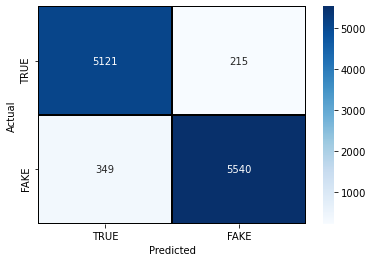

In [26]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Classification report

In [27]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5336
           1       0.96      0.94      0.95      5889

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [28]:
y_pred = model.predict(X_test).ravel()

## ROC AUC PLOT

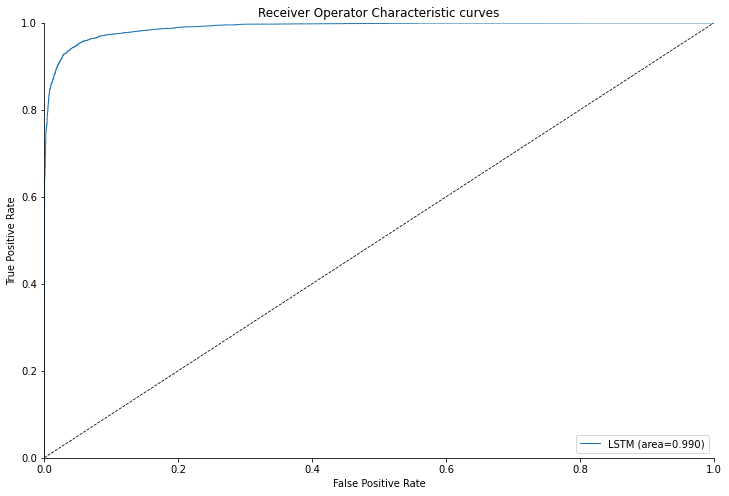

In [29]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba)))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,y_pred,label='LSTM', l='-')



ax.plot([0,1], [0,1], color='k', linewidth=0.8, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()